#### @author: Александр Владимирович Толмачев | axtolm@gmail.com
<hr>

## 1. Основы языка Python

## Часть 3. Библиотека для работы с данными pandas

### На этом занятии мы планируем:
- Познакомиться с библиотекой `pandas` и типами данных `DataFrame` и `Series`, популярными у аналитиков.

### 1. Библиотека `pandas` - типы данных `pandas.Series` и `pandas.DataFrame`

**pandas** - это высокоуровневая библиотека для анализа данных, которая содержит два класса объектов:

**class** `pandas.Series`  
Одномерный массив индексированных данных (временные ряды это тоже тут).  
Подробности на сайте библиотеки:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

**class** `pandas.DataFrame`   
Двумерный массив с гибкими индексами строк и гибкими именами столбцов.    
Каждый столбец можно рассматривать как объект `pandas.Series`.    
Подробности на сайте библиотеки:   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

Сначала импортируем библиотеку `pandas` под псевдонимом `pd`

In [2]:
import pandas as pd    

In [3]:
db_tab_tmp = pd.DataFrame()    # создадим пустой датафрейм
print(type(db_tab_tmp))    # выведем тип

<class 'pandas.core.frame.DataFrame'>


В учебных целях заполним DataFrame вручную.<br>
На практике обычно так не делается, т.к. данные мы откуда-то берем, а не придумываем сами.<br>
Исключение - расчетные фрагменты (по ходу выполнения алгоритма что-то посчитали и присоединили к большому DataFrame).<br>

Возьмем для примера случай из **учебной аналитики**. Определим константы для заполнения.

In [4]:
COURSE_ID = 'URFU_ENGM_F2019'  # id online курса
CHECK_POINT_NAME = 'ravg'      # название контрольной точки
N_STUDENTS = 10                # количество студентов

Заполним столбцы DataFrame с помощью генератора списков и генератора случайных чисел:

In [5]:
import random as rd     # импортируем библиотеку с генератором случайных чисел
rd.seed(1222)           # инициализируем генератор, чтобы получать всегда один набор значений

In [6]:
# заполним столбец идентификатора курса 'course_id' одним и тем же значением константы COURSE_ID
db_tab_tmp['course_id'] = [COURSE_ID for i in range(N_STUDENTS)]  

In [7]:
# заполним идентификаторы студентов 'student_id' случайными числами от 1000 до 9999)
# используем метод из библиотеки random: random.randint(A, B), который выдает случайное целое число N, A ≤ N ≤ B.
db_tab_tmp['student_id'] = [rd.randint(1000, 9999) for i in range(N_STUDENTS)] 

In [8]:
# заполним столбец названий контрольных точек 'check_point_name' значением константы CHECK_POINT_NAME
db_tab_tmp['check_point_name'] = [CHECK_POINT_NAME for i in range(N_STUDENTS)] 

In [9]:
# заполним столбец оценок 'grade' случайными числами от 0.0 до 1.0 и округлим их до 2-х знаков после запятой
db_tab_tmp['grade'] = [round(rd.random(),2) for i in range(N_STUDENTS)] 

In [10]:
db_tab_tmp    # выведем DataFrame на экран

,course_id,student_id,check_point_name,grade
0,URFU_ENGM_F2019,9043,ravg,0.24
1,URFU_ENGM_F2019,7717,ravg,0.19
2,URFU_ENGM_F2019,1194,ravg,0.12
3,URFU_ENGM_F2019,6158,ravg,0.55
4,URFU_ENGM_F2019,9037,ravg,0.90
5,URFU_ENGM_F2019,5662,ravg,0.87
6,URFU_ENGM_F2019,9742,ravg,0.72
7,URFU_ENGM_F2019,4891,ravg,0.88
8,URFU_ENGM_F2019,7401,ravg,0.07
9,URFU_ENGM_F2019,7348,ravg,0.88


In [11]:
type(db_tab_tmp['grade']) # выведем тип одной колонки

pandas.core.series.Series

**Обратим внимание на первую колонку с индексом DataFrame!** - значения по порядку от 0 и названия колонки нет<br>
Можем задать своими руками на свое усмотрение, значения индекса и название индексной колонки

In [12]:
db_tab_tmp.index = [i for i in range(100,100+N_STUDENTS)]   # новые значения индексов 100, 101, ...
db_tab_tmp.index.name = 'our_index'    # название колонки с индексами
db_tab_tmp

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,9043,ravg,0.24
101,URFU_ENGM_F2019,7717,ravg,0.19
102,URFU_ENGM_F2019,1194,ravg,0.12
103,URFU_ENGM_F2019,6158,ravg,0.55
104,URFU_ENGM_F2019,9037,ravg,0.90
105,URFU_ENGM_F2019,5662,ravg,0.87
106,URFU_ENGM_F2019,9742,ravg,0.72
107,URFU_ENGM_F2019,4891,ravg,0.88
108,URFU_ENGM_F2019,7401,ravg,0.07


**Доступ к элементам DataFrame**

**По имени колонки или индекса строки**<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at

In [13]:
# доступ к строке целиком по имени индекса
db_tab_tmp.loc[101]

course_id           URFU_ENGM_F2019
student_id                     7717
check_point_name               ravg
grade                          0.19
Name: 101, dtype: object

In [14]:
# доступ к строке целиком по порядковому номеру индекса
db_tab_tmp.iloc[1]

course_id           URFU_ENGM_F2019
student_id                     7717
check_point_name               ravg
grade                          0.19
Name: 101, dtype: object

In [15]:
# срезы (slices) по индексу тоже работают
db_tab_tmp.iloc[5:7]

,course_id,student_id,check_point_name,grade
our_index,,,,
105,URFU_ENGM_F2019,5662,ravg,0.87
106,URFU_ENGM_F2019,9742,ravg,0.72


In [16]:
# доступ к конкретному элементу таблицы по имени индекса и имени колонки
db_tab_tmp.loc[101]['grade']

0.19

In [17]:
# другой вариант записи - все в одних квадратных скобках через запятую
db_tab_tmp.loc[101,'grade']

0.19

Для доступа к одному конкретному элементу таблицы есть еще метод `at` (он быстрее, чем `loc`, если нужен только один элемент)

In [18]:
# доступ к элементу через at
db_tab_tmp.at[101,'grade']

0.19

`iloc` для доступа к элементам тоже работает, но надо указать номера индекса и колонки, начиная с 0

In [19]:
db_tab_tmp.iloc[1,3]

0.19

**Фильтрация элементов DataFrame**

Обращение к столбцам таблицы так `db_tab_tmp.grade` или так `db_tab_tmp['grade']`

In [20]:
# по значению элементов одного из столбцов (можно использовать >, <, ==, !=, >=, <=)
db_tab_tmp[db_tab_tmp.grade>=0.4]

,course_id,student_id,check_point_name,grade
our_index,,,,
103,URFU_ENGM_F2019,6158,ravg,0.55
104,URFU_ENGM_F2019,9037,ravg,0.90
105,URFU_ENGM_F2019,5662,ravg,0.87
106,URFU_ENGM_F2019,9742,ravg,0.72
107,URFU_ENGM_F2019,4891,ravg,0.88
109,URFU_ENGM_F2019,7348,ravg,0.88


Также для фильтрации есть хороший метод `pandas.DataFrame.isin`<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html

In [21]:
# фильтрация по конкретным id студентов
need_students = [9037,7348]  # зададим руками список id интересующих нас студентов
db_tab_tmp[db_tab_tmp['student_id'].isin(need_students)]

,course_id,student_id,check_point_name,grade
our_index,,,,
104,URFU_ENGM_F2019,9037,ravg,0.90
109,URFU_ENGM_F2019,7348,ravg,0.88


In [22]:
# как работает то, что внутри []
db_tab_tmp['student_id'].isin(need_students)

our_index
100    False
101    False
102    False
103    False
104     True
105    False
106    False
107    False
108    False
109     True
Name: student_id, dtype: bool

**Объект DataFrame имеет очень широкий набор собственных методов для работы с данными**<br>
**Подробности на сайте библиотеки:**

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

**Рассмотрим некоторые из методов**  

**1) Добавление одного DataFrame к другому**

In [23]:
# Сделаем еще один DataFrame, немного модифицируем и присоединим к исходному db_tab_tmp
db_new = db_tab_tmp[db_tab_tmp.grade>0.7].copy()  # получим фильтрацией из исходного и делаем копию
db_new.loc[:,'check_point_name'] = 'tavg'       # изменим значения в одной колонке
db_new

,course_id,student_id,check_point_name,grade
our_index,,,,
104,URFU_ENGM_F2019,9037,tavg,0.90
105,URFU_ENGM_F2019,5662,tavg,0.87
106,URFU_ENGM_F2019,9742,tavg,0.72
107,URFU_ENGM_F2019,4891,tavg,0.88
109,URFU_ENGM_F2019,7348,tavg,0.88


Используем метод `pandas.DataFrame.concat`<br>
https://pandas.pydata.org/docs/reference/api/pandas.concat.html

In [24]:
db_tab_tmp = pd.concat([db_tab_tmp, db_new])
db_tab_tmp

,course_id,student_id,check_point_name,grade
our_index,,,,
100,URFU_ENGM_F2019,9043,ravg,0.24
101,URFU_ENGM_F2019,7717,ravg,0.19
102,URFU_ENGM_F2019,1194,ravg,0.12
103,URFU_ENGM_F2019,6158,ravg,0.55
104,URFU_ENGM_F2019,9037,ravg,0.90
105,URFU_ENGM_F2019,5662,ravg,0.87
106,URFU_ENGM_F2019,9742,ravg,0.72
107,URFU_ENGM_F2019,4891,ravg,0.88
108,URFU_ENGM_F2019,7401,ravg,0.07


**2) Группировка по `check_point_name` и подсчет средних оценок по контрольным точкам** 

Используем метод pandas.DataFrame.groupby<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [25]:
db_tab_tmp.groupby(['check_point_name']).mean()

,student_id,grade
check_point_name,,
ravg,6819.3,0.542
tavg,7336.0,0.850


Усреднение по `student_id` смысла не имеет, а вот со средними по `grade` можно работать

Результат `pandas.DataFrame.groupby` - это тоже `pandas.DataFrame` и доступ к данным как было выше для ячееек таблицы

In [26]:
# выберем среднее по grade для контрольной точки с check_point_name = 'ravg'
db_group = db_tab_tmp.groupby(['check_point_name']).mean()
db_group.loc['ravg','grade']

0.542

In [27]:
# это же можно записать в одну строчку 
db_tab_tmp.groupby(['check_point_name']).mean().loc['ravg','grade']

0.542

**3) Группировка по 'check_point_name' и подсчет количества оценок по контрольным точкам** 

Используем метод `pandas.DataFrame.count`<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html

In [28]:
db_tab_tmp.groupby(['check_point_name']).count()

,course_id,student_id,grade
check_point_name,,,
ravg,10,10,10
tavg,5,5,5


In [29]:
# получение одного нужного значения 
db_tab_tmp.groupby(['check_point_name']).count().loc['tavg','grade']

5

**4) Построим гистограмму распределения по grade** 

Используем метод pandas.DataFrame.hist<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

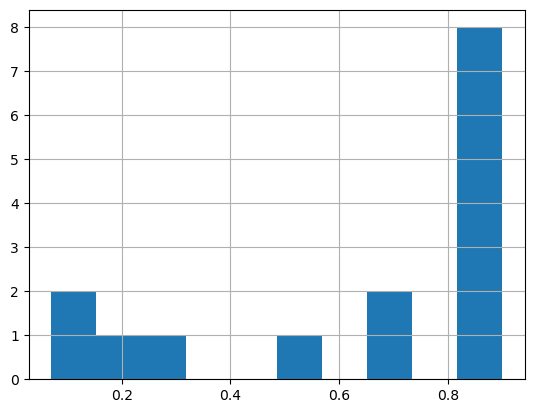

In [30]:
grade_hist = db_tab_tmp['grade'].hist(bins = 10)

**5) Изменим тип всех элементов колонки 'grade'** 

Используем метод pandas.DataFrame.astype<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

In [31]:
db_tab_tmp['grade_str'] = db_tab_tmp['grade'].astype(str)    # преобразуем оценку в строку и сохраним в новой колонке

In [32]:
print(type(db_tab_tmp.iloc[0]['grade']),type(db_tab_tmp.iloc[0]['grade_str']))     # проверим типы данных

<class 'numpy.float64'> <class 'str'>


**6) Подсчет суммы, среднего, стандартного отклонения, количества значений по колонке 'grade'** 

Используем методы: `pandas.DataFrame.sum`, `pandas.DataFrame.mean`, `pandas.DataFrame.std`, `pandas.DataFrame.count`<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html<br>
Важно! метод и аналогичные ему (mean, std, count,...) игнорирует пропуски данных NaN

In [33]:
db_tab_tmp['grade'].sum()    # сумма

9.670000000000002

In [34]:
db_tab_tmp['grade'].mean()     # среднее значение

0.6446666666666668

In [35]:
db_tab_tmp['grade'].std()    # стандартное отклонение

0.321799997040457

In [36]:
db_tab_tmp['grade'].count()     # количество значений

15

**7) Получение новой расчетной колонки путем применения лямбда функции к существующим**

In [39]:
db_tab_tmp['pass'] = list(map(lambda g: 'pass' if g >= 0.4 else 'fail', db_tab_tmp['grade']))
db_tab_tmp

,course_id,student_id,check_point_name,grade,grade_str,pass
our_index,,,,,,
100,URFU_ENGM_F2019,9043,ravg,0.24,0.24,fail
101,URFU_ENGM_F2019,7717,ravg,0.19,0.19,fail
102,URFU_ENGM_F2019,1194,ravg,0.12,0.12,fail
103,URFU_ENGM_F2019,6158,ravg,0.55,0.55,pass
104,URFU_ENGM_F2019,9037,ravg,0.90,0.9,pass
105,URFU_ENGM_F2019,5662,ravg,0.87,0.87,pass
106,URFU_ENGM_F2019,9742,ravg,0.72,0.72,pass
107,URFU_ENGM_F2019,4891,ravg,0.88,0.88,pass
108,URFU_ENGM_F2019,7401,ravg,0.07,0.07,fail


**8) Построение графика по таблице**

Таблица с данными учебной аналитики не очень годится для демонстрации возможностей построения графиков встроенными методами `pandas.DataFrame`. Для примера создадим с помощью генератора списков таблицу со значениями функции $y(x) = sin(x)$

In [169]:
import math as m    # импорт библиотеки math под псевдонимом m
res = pd.DataFrame()    # создание пустой таблицы pandas.DataFrame
x_start = -m.pi    # начальное значение
x_step = 0.1       # шаг аргумента х
n_points = 130     # количество точек
res['x'] = [(x_start + x_step*i) for i in range(n_points)]    # заполним колонку с независимой переменной Х
res['y'] = list(map(lambda x: m.sin(x), res['x']))      # заполним колонку со значением функции Y

Выведем фрагмент (начало) таблицы c помощью метода `pandas.DataFrame.head`

In [170]:
res.head(3)

,x,y
0,-3.141593,-1.224647e-16
1,-3.041593,-9.983342e-02
2,-2.941593,-1.986693e-01


Построим простой график $y(x)$ с помощью метода `pandas.DataFrame.plot` (по умолчанию использует библиотеку `matplotlib`)

<AxesSubplot: xlabel='x'>

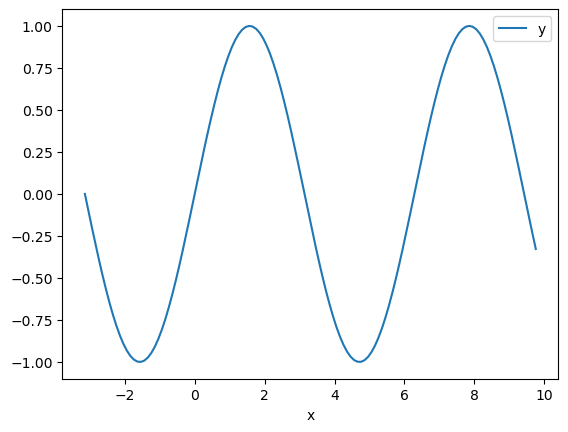

In [171]:
res.plot(x='x', y='y')

### Подведем итоги. На этом занятии мы:
- Познакомились с библиотекой pandas и типами данных DataFrame и Series, а также с отдельными методами работы с данными.